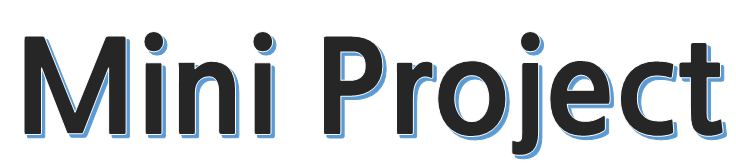

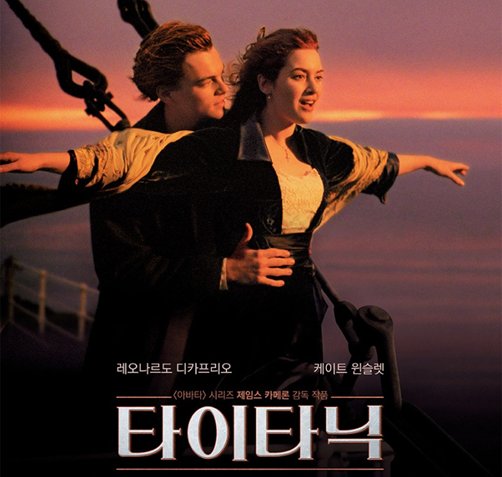

<br><br>
**타이타닉 데이터**를 통해 영화 타이타닉의 주인공 `디카프리오`와 `윈슬릿`의 생존확률을 예측하라.

**Data description**

- 데이터개수 : 1310      
- 컬럼 수 : 14


| 컬럼명 | 설명|
|:-------|:-------|
| pclass | 탑승한 선실의 등급으로, 1 = 1등실, 2 = 2등실, 3 = 3등실이며 1등실이 가장 좋고 3등실이 가장 저렴한 선실이다. |
| **survived** | 생존여부로, 0 = 사망, 1 = 생존 |
| name | 탑승객의 이름 |
| sex | 탑승객의 성별 |
| age | 탑승객의 나이 |
| sibsp | 함께 동승한 배우자 또는 형제자매의 수
| parch | 함께 동승한 부모 또는 자식의 수
| ticket | 티켓번호 |
| fare | 요금 |
| cabin | 선실 호수 |
| embarked | 탑승지로, C = 셰르부르, Q = 퀸즈타운, S = 사우샘프턴 |
| boat | 탈출시 사용한 보트 번호 |
| body | 사망자 확인 번호 |
| home.dest | 고향/목적지 |

## 전체 데이터 살펴보기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')
df.info()  # 목표변수 : survived

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [3]:
# 기초 통계 데이터
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


기초 통계량에서 평균 생존율이 38.2%, 최연소 탑승자 나이가 0.1667살(생후 2개월)임을 알 수 있다.

In [4]:
# 데이터 형태 확인
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


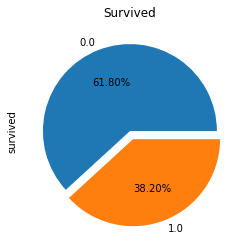

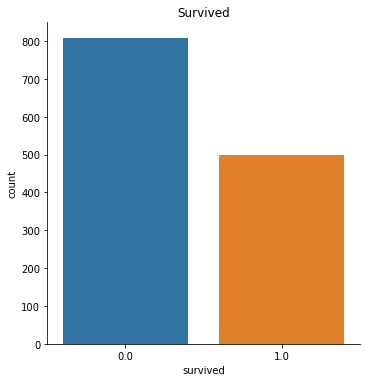

In [5]:
# 생존자 정보를 그래프로 표현
df['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
plt.title('Survived')

sns.catplot(x='survived', data=df, kind='count')
plt.title('Survived')
plt.show() 

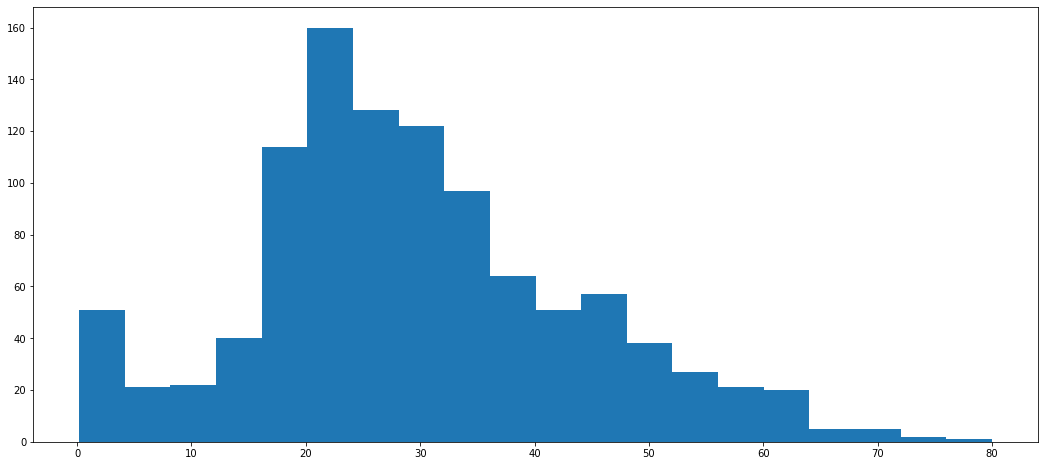

In [6]:
# 연령별 데이터를 히스토그램으로 확인
df['age'].hist(bins=20, figsize=(18,8), grid=False);

In [12]:
# groupby 명령은 지정된 컬럼을 인덱스로 데이터를 재정렬한다.
df.groupby('pclass').head()
#df.groupby('pclass').mean()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
323,2.0,0.0,"Abelson, Mr. Samuel",male,30.0000,1.0,0.0,P/PP 3381,24.0000,NaN,C,NaN,NaN,"Russia New York, NY"
324,2.0,1.0,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0000,1.0,0.0,P/PP 3381,24.0000,NaN,C,10,NaN,"Russia New York, NY"
325,2.0,0.0,"Aldworth, Mr. Charles Augustus",male,30.0000,0.0,0.0,248744,13.0000,NaN,S,NaN,NaN,"Bryn Mawr, PA, USA"
326,2.0,0.0,"Andrew, Mr. Edgardo Samuel",male,18.0000,0.0,0.0,231945,11.5000,NaN,S,NaN,NaN,"Buenos Aires, Argentina / New Jersey, NJ"
327,2.0,0.0,"Andrew, Mr. Frank Thomas",male,25.0000,0.0,0.0,C.A. 34050,10.5000,NaN,S,NaN,NaN,"Cornwall, England Houghton, MI"


1등실의 평균연령이 가장 높고, 생존율도 가장 높다.    
1등실은 상류층 사람들이 많이 이용했을테니, 상류층 사람들이 더 많이 살아남은 것으로 보인다.

In [13]:
# 변수간 상관도 확인
df.corr()

,pclass,survived,age,sibsp,parch,fare,body
pclass,1.000000,-0.312469,-0.408106,0.060832,0.018322,-0.558629,-0.034642
survived,-0.312469,1.000000,-0.055513,-0.027825,0.082660,0.244265,NaN
age,-0.408106,-0.055513,1.000000,-0.243699,-0.150917,0.178739,0.058809
sibsp,0.060832,-0.027825,-0.243699,1.000000,0.373587,0.160238,-0.099961
parch,0.018322,0.082660,-0.150917,0.373587,1.000000,0.221539,0.051099
fare,-0.558629,0.244265,0.178739,0.160238,0.221539,1.000000,-0.043110
body,-0.034642,NaN,0.058809,-0.099961,0.051099,-0.043110,1.000000


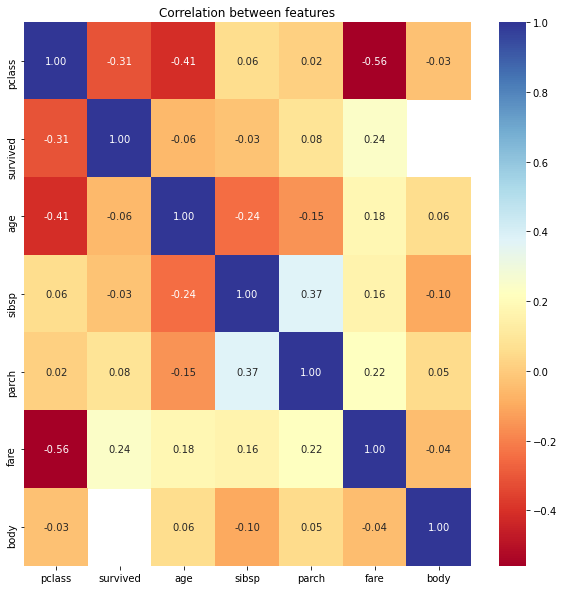

In [14]:
# heatmap으로 확인
hm = sns.heatmap(df.corr(), annot=True, fmt='.2f', 
                cmap = 'RdYlBu', ax = plt.figure(figsize=(10,10)).gca()  
                )
plt.title('Correlation between features')
plt.show()

survived과 pclass는 음의 상관관계, pclass와 age도 음의 상관관계, fare와 pclass는 음의 상관관계에 있다.    
즉, 선실 등급의 숫자가 낮을수록(1등실 일수록) 생존율은 높아지고, 나이도 많아지며, 요금도 비싸진다.


## 세부적으로 데이터 살펴보기

In [16]:
# 나이를 구간별로 나누어 살펴보기
# cut함수를 이용하여 나이의 기준을 만들고, 각각에 라벨을 붙여
df['age_cat'] = pd.cut(df['age'], 
                       bins=[0, 3, 7, 15, 30, 60, 100], # 나이 분할 구간
                       include_lowest=True,            # 하한 포함
                       labels=['baby', 'children', 'teenage', 'young', 'adult', 'old'])
df.head(20)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
7,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",adult
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult
9,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",old


In [17]:
# 나이 카테고리를 인덱스로 재정렬 후 평균을 구한다.
df.groupby('age_cat').mean()

,pclass,survived,age,sibsp,parch,fare,body
age_cat,,,,,,,
baby,2.585366,0.634146,1.540651,1.487805,1.365854,29.615346,4.000000
children,2.640000,0.640000,5.160000,1.760000,1.360000,31.022828,NaN
teenage,2.632653,0.489796,11.540816,1.734694,1.163265,38.390904,132.000000
young,2.412955,0.368421,23.389676,0.352227,0.236842,27.313140,169.720930
adult,1.893564,0.423267,41.548267,0.376238,0.405941,47.141986,154.777778
old,1.545455,0.242424,65.393939,0.303030,0.363636,60.248309,185.600000


baby에 가까운 연령일수록 3등실에 많이 탑승하였고, 생존율이 높다.    
adult나 old로 갈수록 선실 등급은 좋아지나, 생존율은 낮다.   

이는 이전의 상관관계 분석과와 다른 결론이다. (상관관계 분석 결과 : 선실 등급의 숫자가 낮을수록(1등실 일수록) 생존율은 높아지고, 나이도 많아지며, 요금도 비싸진다.)





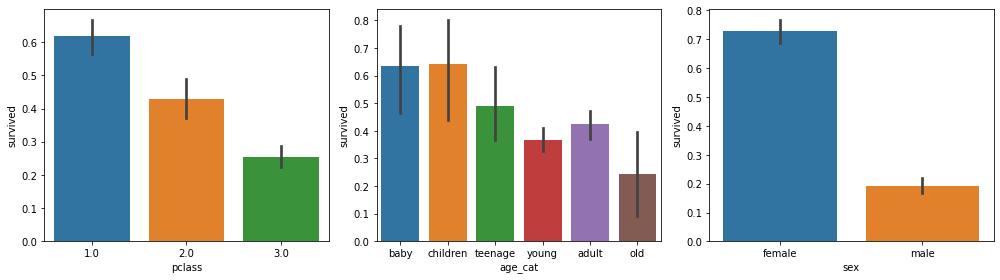

In [18]:
# 선실별, 나이별, 성별 생존자 비율
plt.figure(figsize=[14,4])
plt.subplot(131), sns.barplot(x='pclass', y='survived', data=df)
plt.subplot(132), sns.barplot(x='age_cat', y='survived', data=df)
plt.subplot(133), sns.barplot(x='sex', y='survived', data=df)
plt.tight_layout()
plt.show()

1등실의 생존율이 가장 높고, 아이의 생존율이 높으며, 여성의 생존율이 높다.   
구조원칙 : 아이와 여자부터!

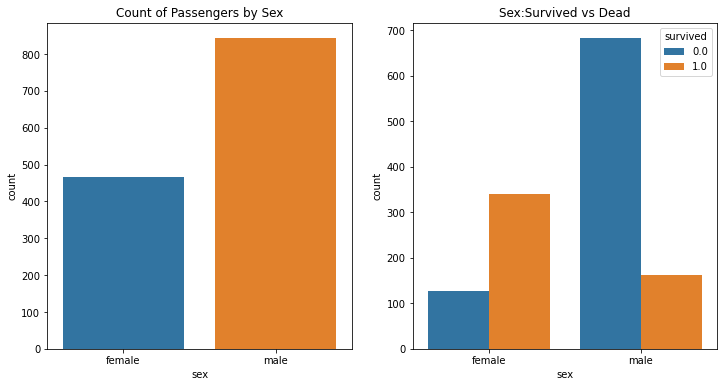

In [19]:
# 성별 분석 (탑승자와 생존자)
f, ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(x='sex',data=df, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='sex',hue='survived',data=df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

## 보트 탑승 승객의 생존율 확인

In [22]:
boat_survivors = df[df['boat'].notnull()]  # 보트 번호가 있다면 구명보트에 탑승한 것이다.
boat_survivors.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
5,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",adult
6,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",old
8,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",adult


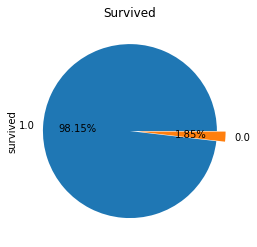

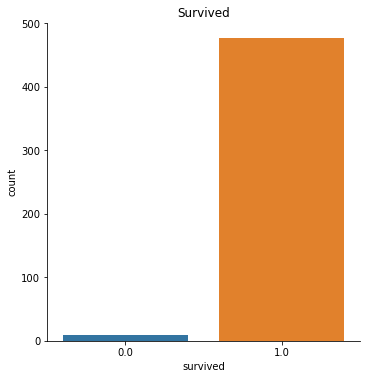

In [23]:
# 보트 탑승자 중 생존자 비율
boat_survivors['survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.2f%%')
plt.title('Survived')

sns.catplot(x='survived', data=boat_survivors, kind='count')
plt.title('Survived')
plt.show()


생존자를 예측하는 특징으로 이 컬럼을 사용하면, 모델은 보트 탑승 여부만을 확인할 수 있다. 즉, 특징으로 사용하기에 적합하지 않다.

## 데이터 가공, 특징 선택

DecisionTree 모델을 위한 데이터 가공

In [24]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [25]:
# 성별을 숫자로 변경
tmp = []
for each in df['sex']:
    if each == 'female':
        tmp.append(0)
    elif each == 'male':
        tmp.append(1)
    else:
        tmp.append(np.nan)

df['sex'] = tmp
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


목표변수는 survived이고, 수치형 데이터를 특징으로 선택 (선실등급, 성별, 배우자 및 형제자매 동승자, 부모자녀 동승자, 요금)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   float64 
 1   survived   1309 non-null   float64 
 2   name       1309 non-null   object  
 3   sex        1309 non-null   float64 
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   float64 
 6   parch      1309 non-null   float64 
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 144.9+ KB


In [27]:
df['survived'] = df['survived'].astype('float')
df['pclass'] = df['pclass'].astype('float')
df['sex'] = df['sex'].astype('float')
df['sibsp'] = df['sibsp'].astype('float')
df['parch'] = df['parch'].astype('float')
df['fare'] = df['fare'].astype('float')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


In [28]:
# NaN 데이터 제거 : 결측치 제거
df = df[df['age'].notnull()]
df = df[df['sibsp'].notnull()]
df = df[df['parch'].notnull()]
df = df[df['fare'].notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   float64 
 1   survived   1045 non-null   float64 
 2   name       1045 non-null   object  
 3   sex        1045 non-null   float64 
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   float64 
 6   parch      1045 non-null   float64 
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
dtypes: category(1), float64(8), object(6)
memory usage: 123.7+ KB


In [29]:
data = df[['pclass','sex','age','sibsp','parch','fare']]
data.head()

,pclass,sex,age,sibsp,parch,fare
0,1.0,0.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,2.0000,1.0,2.0,151.5500
3,1.0,1.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,25.0000,1.0,2.0,151.5500


## 생존자 예측 모델 데이터셋 생성

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    df[['survived']], # 목표변수
                                                    test_size=0.1, 
                                                    random_state=13)  # shuffle=True가 default 값이고, random_state는 seed number이다.

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  940 non-null    float64
 1   sex     940 non-null    float64
 2   age     940 non-null    float64
 3   sibsp   940 non-null    float64
 4   parch   940 non-null    float64
 5   fare    940 non-null    float64
dtypes: float64(6)
memory usage: 51.4 KB


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  105 non-null    float64
 1   sex     105 non-null    float64
 2   age     105 non-null    float64
 3   sibsp   105 non-null    float64
 4   parch   105 non-null    float64
 5   fare    105 non-null    float64
dtypes: float64(6)
memory usage: 5.7 KB


In [33]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940 entries, 710 to 378
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  940 non-null    float64
dtypes: float64(1)
memory usage: 14.7 KB


In [34]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105 entries, 699 to 1057
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  105 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


In [35]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare
710,3.0,0.0,37.0,0.0,0.0,7.7500
423,2.0,1.0,34.0,0.0,0.0,13.0000
646,3.0,0.0,38.0,1.0,5.0,31.3875
596,2.0,1.0,31.0,0.0,0.0,13.0000
286,1.0,0.0,63.0,1.0,0.0,221.7792


In [36]:
# 인덱스를 0부터 시작하도록 수정
X_train = X_train.reset_index() #인덱스를 초기화 오름차순 정렬
X_train = X_train.drop(['index'], axis=1) #기존 index를 없에는 drop | axis가 열 , 행 지정

X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

y_train = y_train.reset_index()
y_train = y_train.drop(['index'], axis=1)

y_test = y_test.reset_index()
y_test = y_test.drop(['index'], axis=1)

X_train.head()

,pclass,sex,age,sibsp,parch,fare
0,3.0,0.0,37.0,0.0,0.0,7.7500
1,2.0,1.0,34.0,0.0,0.0,13.0000
2,3.0,0.0,38.0,1.0,5.0,31.3875
3,2.0,1.0,31.0,0.0,0.0,13.0000
4,1.0,0.0,63.0,1.0,0.0,221.7792


## 생존자 예측 모델 : DecisionTreeClassifier
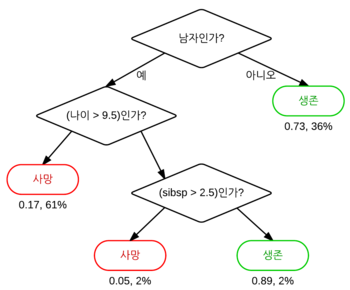

Score: 0.8117021276595745


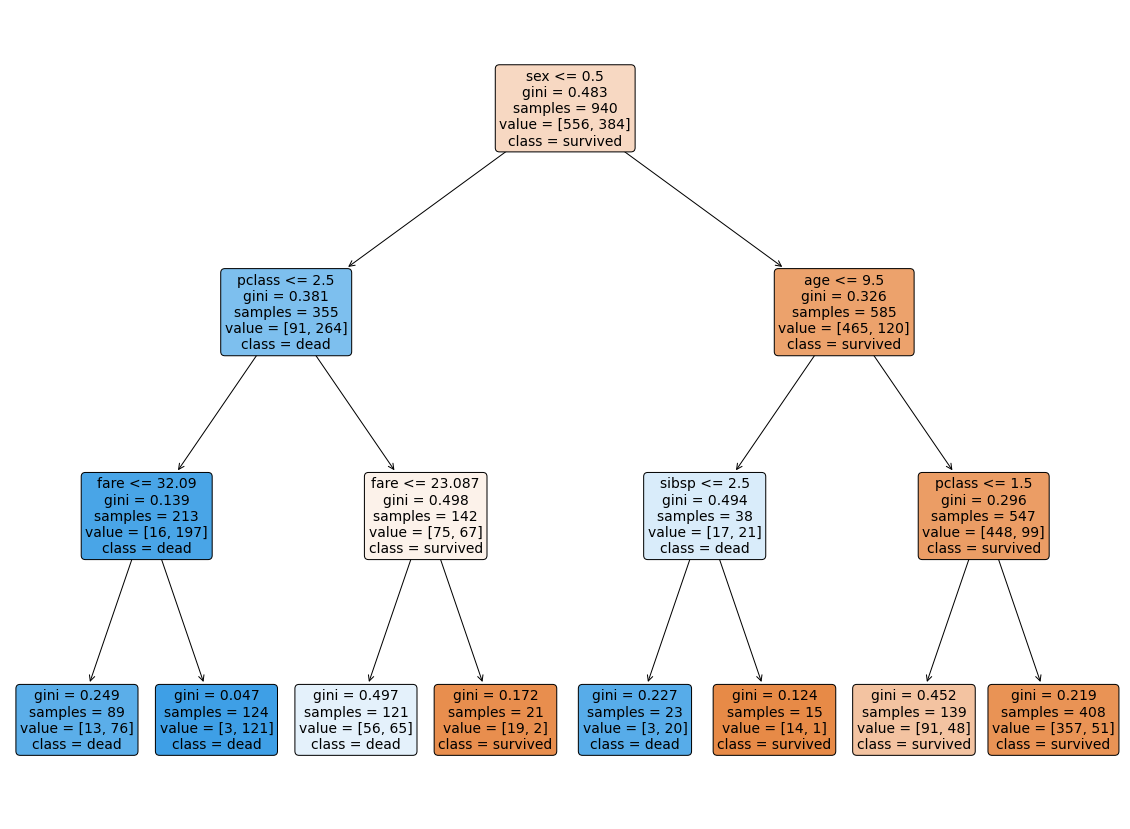

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)

# 정확도
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

# 트리 시각화
plt.figure( figsize=(20,15) )
tree.plot_tree(tree_clf, 
               class_names=['survived','dead'],
               feature_names=data.columns,
               impurity=True, filled=True,
               rounded=True)
plt.show()

<AxesSubplot:>

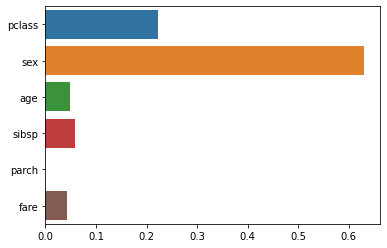

In [38]:
# 특징의 중요도 

# 트리 분류 모델 형성에 각 특성이 얼마나 작용했는지 평가하는 지표이다.
# 해당 지표는 0~1사이의 값을 가지며, 0이면 특성이 전혀 작용하지 않았음을 의미하고 1은 완전하게 작용했음을 의미한다.
# 특성 중요도 전체의 합은 1이다.

sns.barplot(x=tree_clf.feature_importances_ , y=data.columns)

## 디카프리오와 윈슬릿의 운명은?

- 디카프리오는 3등실 객실에 탑승한 남성으로 19세이며, 부모, 형제, 자녀 없이 홀로 아주 저렴한 $5에 탑승하였고,     
- 윈슬릿은 1등실 객실에 탑승한 17세 여성으로 어머니와 약혼자와 함께 탑승하였다.

In [40]:
#        pclass, sex,   age,  sibsp,  parch,   fare
dicaprio = [3.,   1.,   19.,    2,      2.,    5.]    # [3., 1.,  9., 0, 1., 5.]
winslet =  [1.,   0.,   17.,    1.,     1.,    100.]

In [41]:
tree_clf.predict_proba([winslet])

array([[0.02419355, 0.97580645]])

In [42]:
tree_clf.predict_proba([dicaprio])

array([[0.875, 0.125]])

In [45]:
def isSurvived(name, person):
    if tree_clf.predict([person])[0] == 0:
        isSurvive = 'not survived' 
    else: 
        isSurvive = 'survived'
    print(f'{name} is {isSurvive} --> {max(tree_clf.predict_proba([person])[0])*100:.2f}%')
    
isSurvived('Dicaprio', dicaprio)
isSurvived('Winslet', winslet)

Dicaprio is not survived --> 87.50%
Winslet is survived --> 97.58%


# 참고문헌
누구나 PYTHON 너도 데이터 가지고 놀 수 있어, 민형기, (주)잇플